<a href="https://colab.research.google.com/github/Nawaphong-13/nawaphong-AI/blob/master/Visualize_Filters_and_Feature_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Filters and Feature Maps

![zax](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png "zax")

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import cv2
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Visualization"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

def plot_feature_maps(n_rows, n_cols, fmap):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(fmap[0, :, :, index], interpolation="nearest")
            plt.axis('off')
            plt.title('feature_maps ' + str(index), fontsize=6)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()
    
def plot_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    
def averate_fmap(features_map):
    shape_fmap = features_map.shape[0:2]
    len_fmap = features_map.shape[-1]
    fmap_new = np.zeros((shape_fmap))
    for i in range(len_fmap):
        fmap_new += features_map[:, :, i]
    return fmap_new/255

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro RTX 3000, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



# Load the model VGG

* [Pretrain Model in Keras API](https://keras.io/api/applications/).

In [ ]:
model = keras.applications.VGG16(include_top=False, 
                                 weights="imagenet", 
                                 input_shape=(224, 224, 3))
model.summary()
# tf.keras.utils.plot_model(model, "VGG16.png", show_shapes=True)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

![zax](https://miro.medium.com/max/963/1*U8uoGoZDs8nwzQE3tOhfkw@2x.png "zax")




In [ ]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(filters.shape, biases.shape, layer.name)

(3, 3, 3, 64) (64,) block1_conv1
(3, 3, 64, 64) (64,) block1_conv2
(3, 3, 64, 128) (128,) block2_conv1
(3, 3, 128, 128) (128,) block2_conv2
(3, 3, 128, 256) (256,) block3_conv1
(3, 3, 256, 256) (256,) block3_conv2
(3, 3, 256, 256) (256,) block3_conv3
(3, 3, 256, 512) (512,) block4_conv1
(3, 3, 512, 512) (512,) block4_conv2
(3, 3, 512, 512) (512,) block4_conv3
(3, 3, 512, 512) (512,) block5_conv1
(3, 3, 512, 512) (512,) block5_conv2
(3, 3, 512, 512) (512,) block5_conv3


 * Retrieve weights from the second hidden layer

In [ ]:
filters, biases = model.layers[1].get_weights()
print(filters.shape, biases.shape, model.layers[1].name)

(3, 3, 3, 64) (64,) block1_conv1


* Normalize filter values to 0-1 so we can visualize them

In [ ]:
f_min, f_max = filters.min(), filters.max()
print('max: '+ str(filters.max()) + '  ' + 'min: '+ str(filters.min()) )
filters = (filters - f_min) / (f_max - f_min)
print('new_max: '+ str(filters.max()) + '  ' + 'new_min: '+ str(filters.min()) )

max: 0.6085159  min: -0.67140007
new_max: 1.0  new_min: 0.0


* Plot first few filters

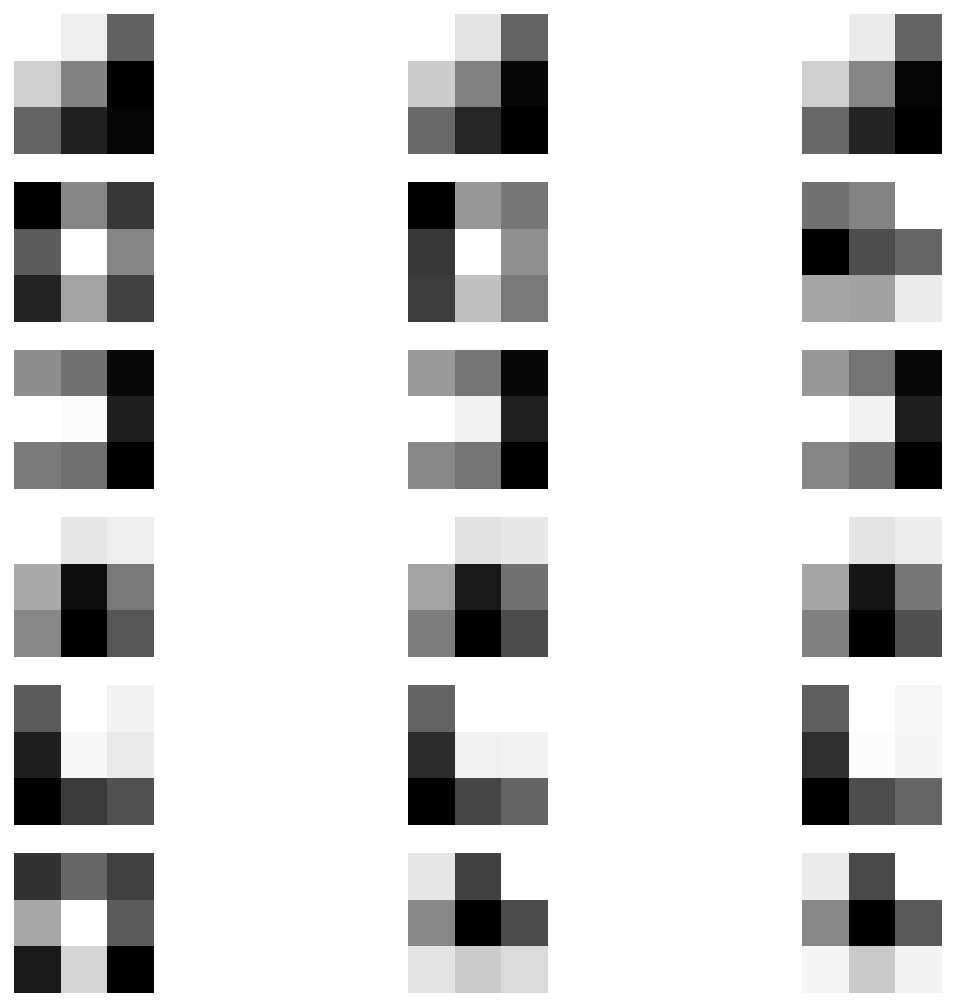

In [ ]:
n_filters, ix = 6, 1
plt.figure(figsize=(10,9))
for i in range(n_filters):
    f = filters[:,:,:,i]
    # plot each channel separately
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,j], cmap='gray', interpolation="nearest")
        plt.axis('off')
        ix += 1
plt.show()

![zax](https://miro.medium.com/max/963/1*hbp1VRfeWnaREPrRLnxtqQ@2x.png "zax")

# Load Images

In [ ]:
import requests
from PIL import Image
import io
import numpy as np
import cv2


from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

url_bird = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/bird.jpg'
url_cat = 'http://www.yespetshop.com/private_folder/kitten-1.jpg'
r_bird = requests.get(url_bird)
r_cat = requests.get(url_cat)

img_bird = np.array(Image.open(io.BytesIO(r_bird.content)))
img_cat = np.array(Image.open(io.BytesIO(r_cat.content)))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Quadro RTX 3000, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



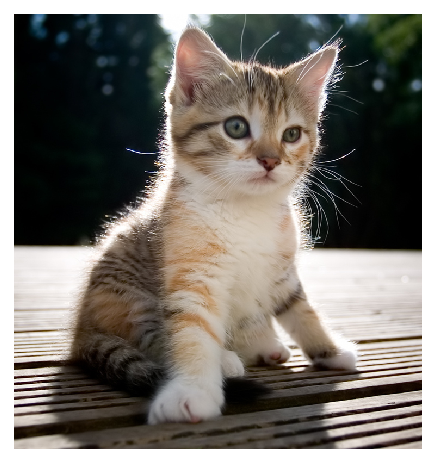

In [ ]:
plot_color_image(img_cat)

![zax](https://miro.medium.com/max/963/1*VjN03E-hiCTpqfugD8EzsQ@2x.png "zax")

In [ ]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = keras.Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# load the image with the required shape
img = cv2.resize(img_cat, (224,224))

# convert the image to an array
# img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = keras.applications.vgg16.preprocess_input(img)
print(img.shape)

# get feature map for first hidden layer
feature_maps = model.predict(img)

(1, 224, 224, 3)


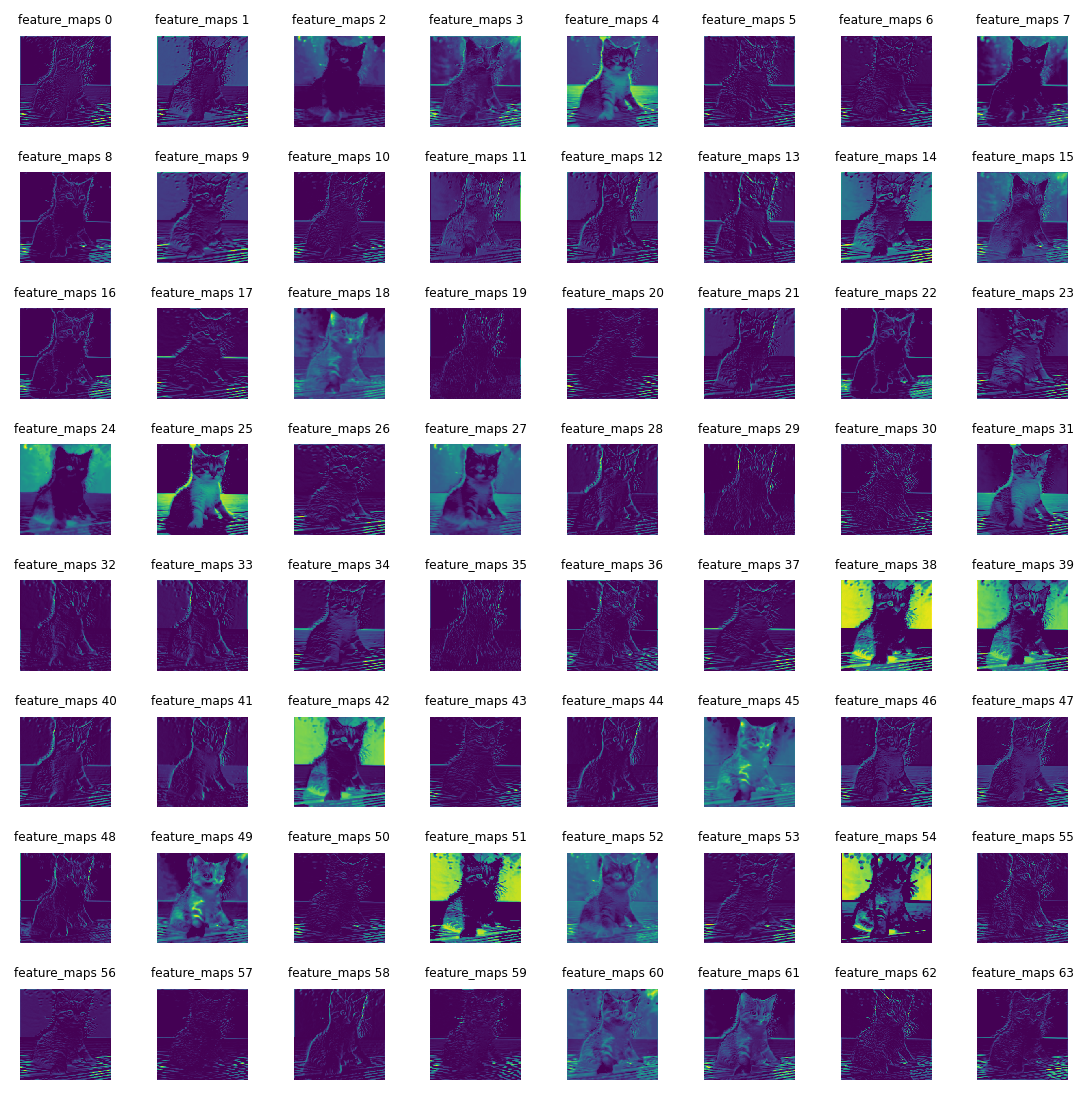

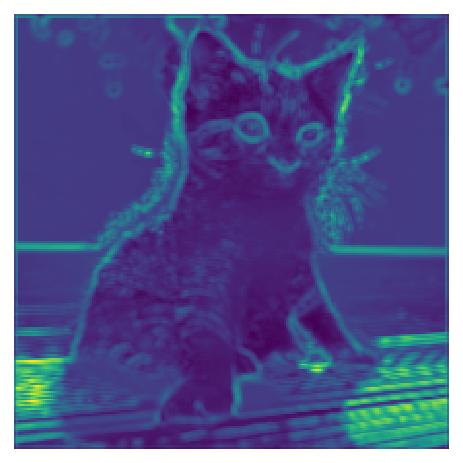

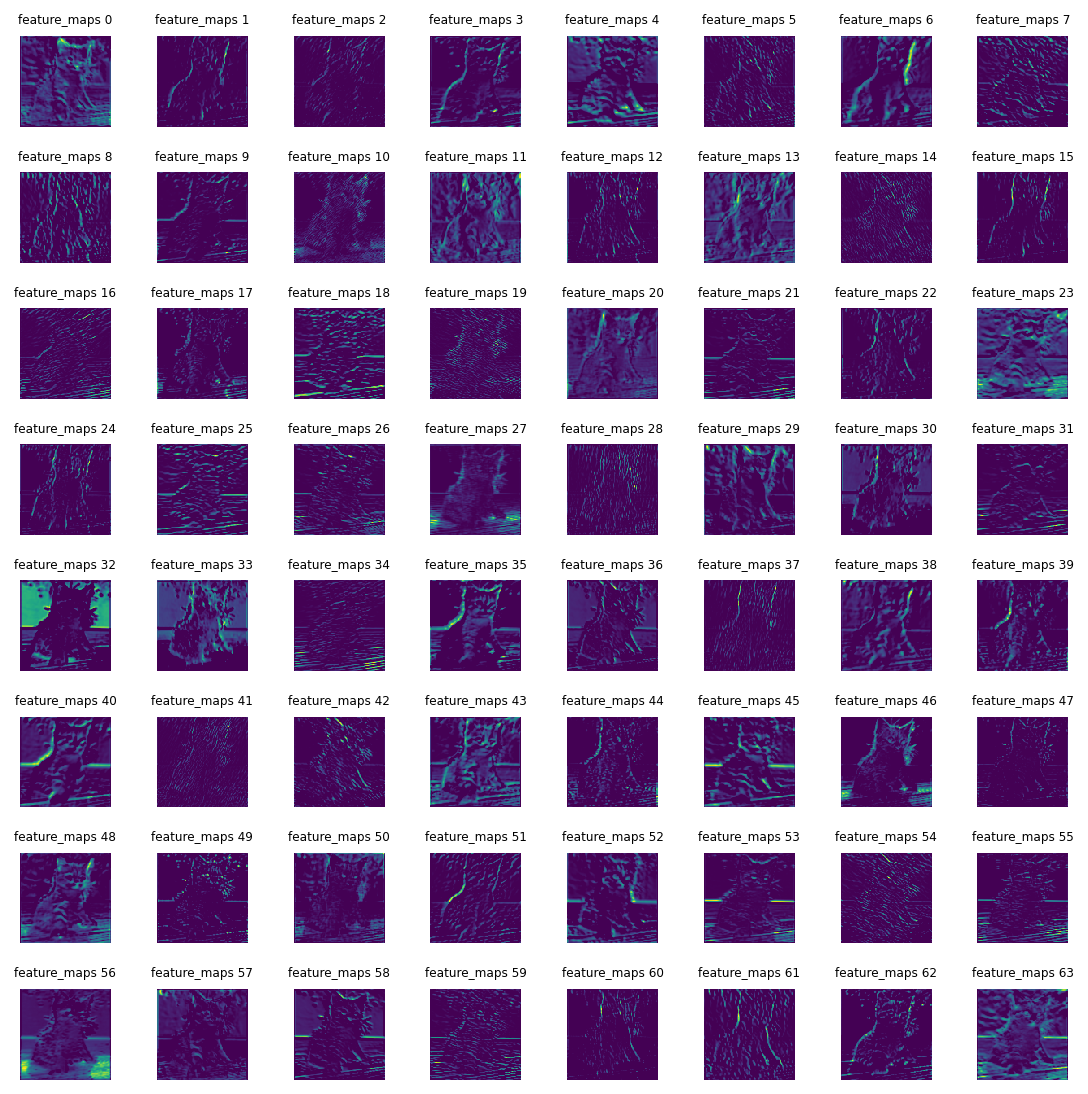

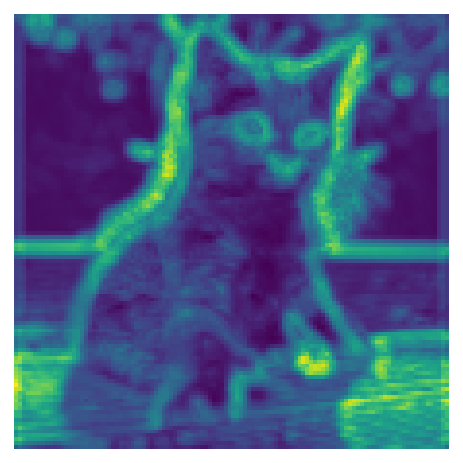

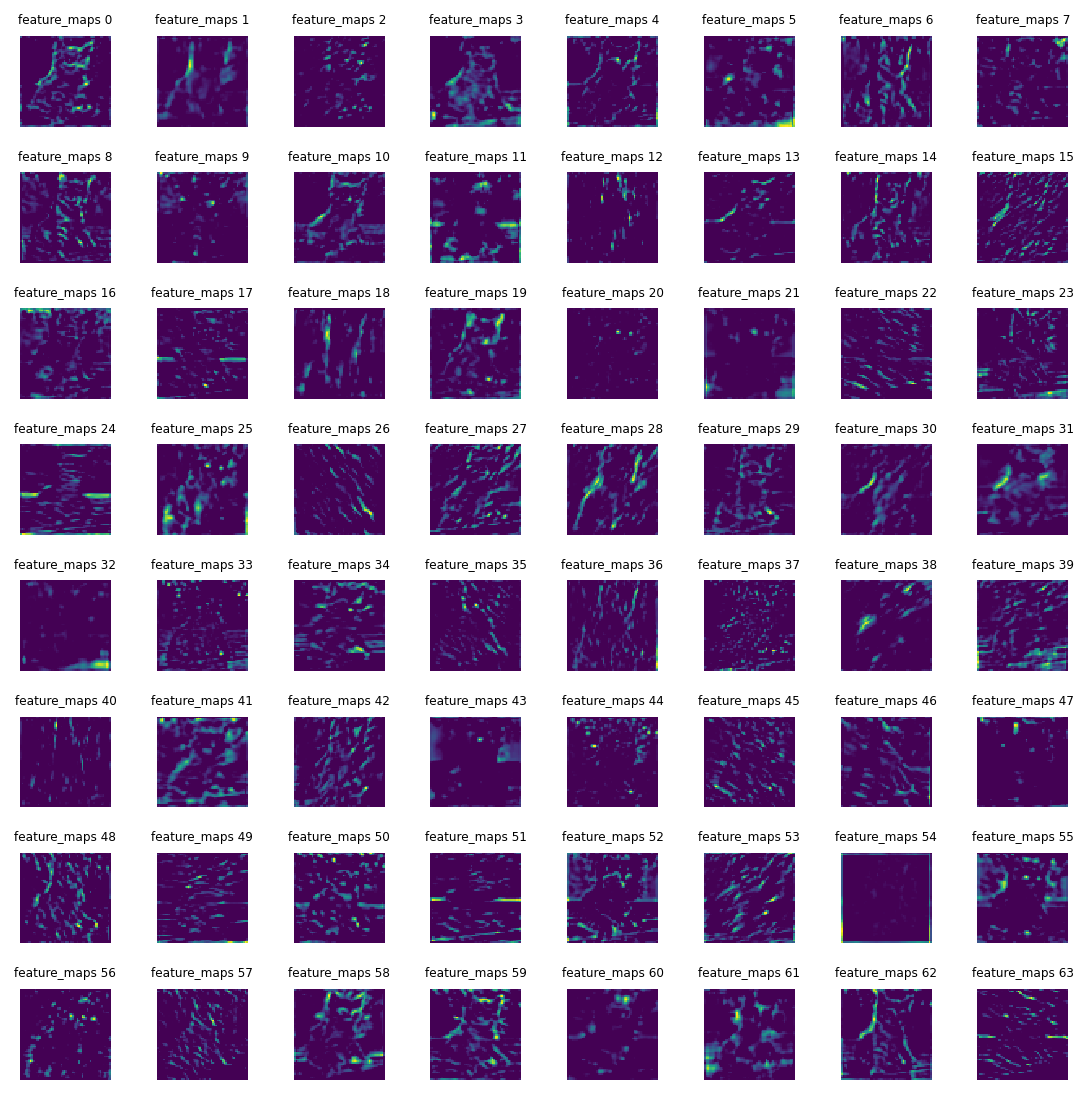

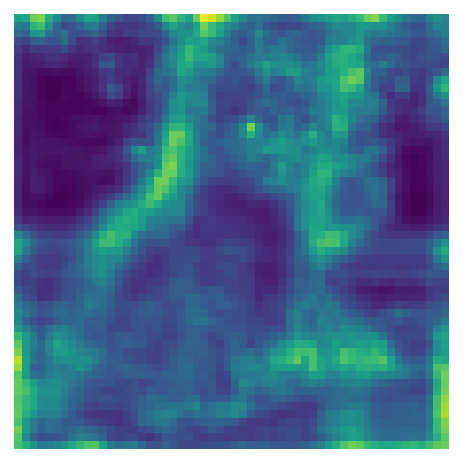

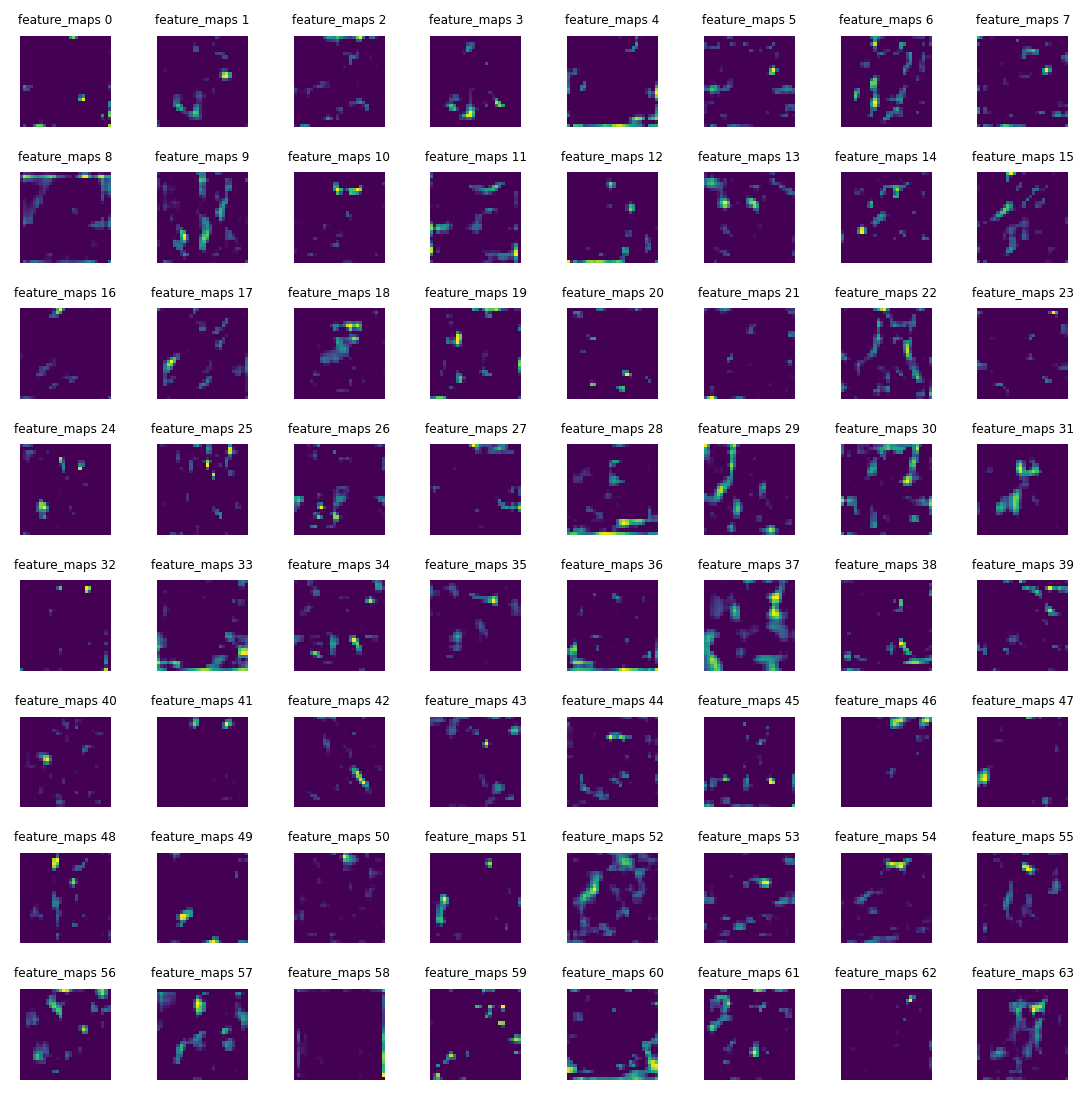

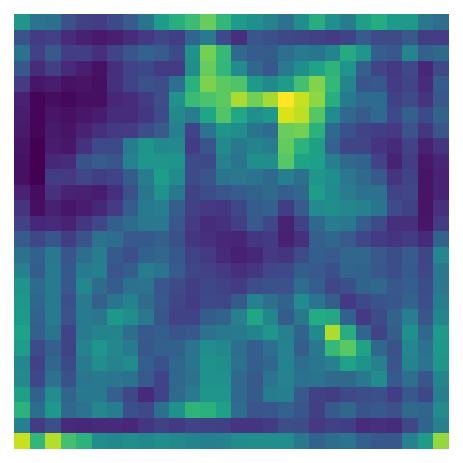

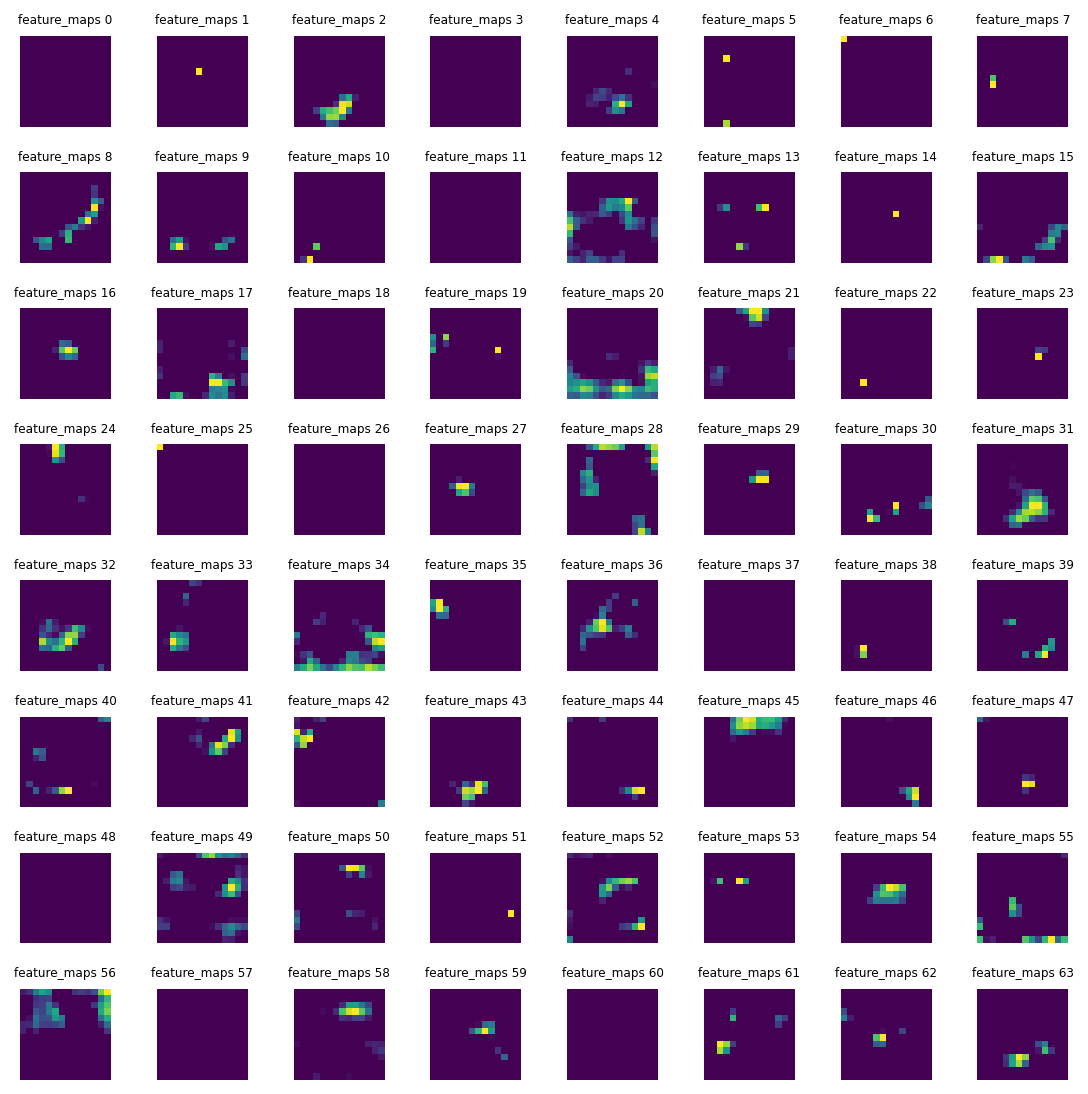

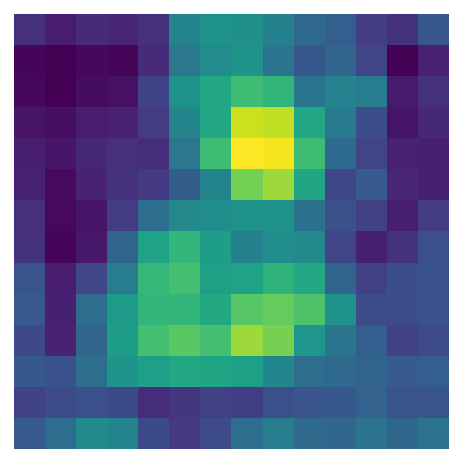

In [ ]:
for fmap in feature_maps:
    plot_feature_maps(8,8,fmap)
    fmap_new = averate_fmap(fmap[0])
    plot_image(fmap_new)

# Reference

* [Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/).

* [Convolutional Neural Network ](https://medium.com/@natthawatphongchit/%E0%B8%A1%E0%B8%B2%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B8%94%E0%B8%B9%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%84%E0%B8%B4%E0%B8%94%E0%B8%82%E0%B8%AD%E0%B8%87-cnn-%E0%B8%81%E0%B8%B1%E0%B8%99-e3f5d73eebaa).

* [Machine Learning Notebooks: Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://github.com/ageron/handson-ml2).

* [Artificial Intelligence with Machine Learning, AI สร้างได้ด้วยแมชชีนเลิร์นนิ่ง](https://www.se-ed.com/product/Artificial-Intelligence-with-Machine-Learning-AI-%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87%E0%B9%84%E0%B8%94%E0%B9%89%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B9%81%E0%B8%A1%E0%B8%8A%E0%B8%8A%E0%B8%B5%E0%B8%99%E0%B9%80%E0%B8%A5%E0%B8%B4%E0%B8%A3%E0%B9%8C%E0%B8%99%E0%B8%99%E0%B8%B4%E0%B9%88%E0%B8%87.aspx?no=9786164870710).

* [Python Image Processing Cookbook](https://github.com/PacktPublishing/Python-Image-Processing-Cookbook).